<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/IndividualParties/JDU2Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 226 (delta 82), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (226/226), 16.72 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-02-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#jdu bihar")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('jdu1.csv') 

RT @IndiaToday: The India Today-Axis My India Exit Poll predicted that Chirag Paswan's Lok Janshakti Party (#LJP) breaking out of the #NDA…
<--------------------------------------------------->
1
@AmitShah a sixer in #bihar #ljp #paswan #jdu #NitishKumar  #NDA. #Opp  is #fucked
<--------------------------------------------------->
2
RT @firstpost: "We are confident that the results on 10 November will be different from the projections of #exitpolls. People of #Bihar ack…
<--------------------------------------------------->
3
Will #SocialMedia management &amp; advance advertisement strategies followed by #JDU-#BJP alliance help #NitishKumar to… https://t.co/aYdw5lveEH
<--------------------------------------------------->
4
who will win bihar election 2020.

#Mahagathbandhan or
#NDA , #JDU 

#modi_ji
#TejashwiYadav 
#NitishKumar… https://t.co/htFgK2VOtm
<--------------------------------------------------->
5
@MinhazMerchant Sheer bad luck that #Bihar didn't find a good alternative to th

# **Importing Libraries**


In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING JDU DATASET 1**

In [ ]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

103



> **Removing duplicates tweets if any.**



In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

79

In [ ]:
df['Tweet'].duplicated().sum()

24

```
Number of duplicates tweets
```



In [ ]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(79, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [ ]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

13

In [ ]:
df.shape

(66, 2)

In [ ]:
df['Processed_Tweet']

1     @AmitShah a sixer in #bihar #ljp #paswan #jdu ...
3     Will #SocialMedia management &amp; advance adv...
4     who will win bihar election 2020.\n\n#Mahagath...
5     @MinhazMerchant Sheer bad luck that #Bihar did...
6     T-Factor\nAccording to Einstein-\nE= (mc)^2\nO...
                            ...                        
74    Story 69 from #Bihar with @Mukesh_Journo \n\nJ...
75    JD-U supporters attend Bihar Chief Ministers e...
76    #BiharElections : Never before have red, green...
77    @rssurjewala @INCIndia #NitishKumar didn't bri...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object



>**Removing username**



In [ ]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

1       a sixer in #bihar #ljp #paswan #jdu #NitishK...
3     Will #SocialMedia management &amp; advance adv...
4     who will win bihar election 2020.\n\n#Mahagath...
5       Sheer bad luck that #Bihar didn't find a goo...
6     T-Factor\nAccording to Einstein-\nE= (mc)^2\nO...
                            ...                        
74    Story 69 from #Bihar with   \n\nJDU suspends M...
75    JD-U supporters attend Bihar Chief Ministers e...
76    #BiharElections : Never before have red, green...
77        #NitishKumar didn't bring development and ...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object



> **Removing URL, if any**



In [ ]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

1       a sixer in #bihar #ljp #paswan #jdu #NitishK...
3     Will #SocialMedia management &amp; advance adv...
4     who will win bihar election 2020.\n\n#Mahagath...
5       Sheer bad luck that #Bihar didn't find a goo...
6     T-Factor\nAccording to Einstein-\nE= (mc)^2\nO...
                            ...                        
74    Story 69 from #Bihar with   \n\nJDU suspends M...
75    JD-U supporters attend Bihar Chief Ministers e...
76    #BiharElections : Never before have red, green...
77        #NitishKumar didn't bring development and ...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object



> **Removing Hashtags but keeping the word**



In [ ]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

1       a sixer in bihar ljp paswan jdu NitishKumar ...
3     Will SocialMedia management &amp; advance adve...
4     who will win bihar election 2020.\n\nMahagathb...
5       Sheer bad luck that Bihar didn't find a good...
6     T-Factor\nAccording to Einstein-\nE= (mc)^2\nO...
                            ...                        
74    Story 69 from Bihar with   \n\nJDU suspends ML...
75    JD-U supporters attend Bihar Chief Ministers e...
76    BiharElections : Never before have red, green ...
77        NitishKumar didn't bring development and p...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object



> **Using Preprocessor library**



In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

1     a sixer in bihar ljp paswan jdu NitishKumar ND...
3     Will SocialMedia management &amp; advance adve...
4     who will win bihar election .Mahagathbandhan o...
5     Sheer bad luck that Bihar didn't find a good a...
6     T-FactorAccording to Einstein-E= (mc)^2On this...
                            ...                        
74    Story from Bihar with JDU suspends MLC Dinesh ...
75    JD-U supporters attend Bihar Chief Ministers e...
76    BiharElections : Never before have red, green ...
77    NitishKumar didn't bring development and prosp...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [ ]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

1     a sixer in bihar ljp paswan jdu NitishKumar ND...
3     Will SocialMedia management  amp  advance adve...
4     who will win bihar election  Mahagathbandhan o...
5     Sheer bad luck that Bihar didn t find a good a...
6     T FactorAccording to Einstein E   mc   On this...
                            ...                        
74    Story from Bihar with JDU suspends MLC Dinesh ...
75    JD U supporters attend Bihar Chief Ministers e...
76    BiharElections   Never before have red  green ...
77    NitishKumar didn t bring development and prosp...
78    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object

> **Converting to lowercase**

In [ ]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

1     a sixer in bihar ljp paswan jdu nitishkumar nd...
3     will socialmedia management  amp  advance adve...
4     who will win bihar election  mahagathbandhan o...
5     sheer bad luck that bihar didn t find a good a...
6     t factoraccording to einstein e   mc   on this...
                            ...                        
74    story from bihar with jdu suspends mlc dinesh ...
75    jd u supporters attend bihar chief ministers e...
76    biharelections   never before have red  green ...
77    nitishkumar didn t bring development and prosp...
78    maybe bihar elect one foe inorder to take down...
Name: Processed_Tweet, Length: 66, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['own', "wasn't", 'because', 'the', "haven't", 'at', 'about', 'through', 'herself', 'does', 'whom', 'under', 'to', 'me', 'not', "weren't", 'when', 'don', 'my', 'yours', 'are', 'himself', 's', 'such', 'if', 'having', 'above', 'than', 'wasn', 'while', 'out', 've', 'you', 'i', 'which', 'with', 'will', 'over', 'more', 'hasn', 'no', 'their', 'up', 'all', 'some', 'but', 'o', "shouldn't", 'needn', 'after', 'mustn', "that'll", 'that', "don't", 'her', 'this', 'them', 'from', 'doesn', 'ain', 'just', 'those', 'ourselves', 'being', "mightn't", 'him', 'll', 'again', 'as', 'yourself', 'our', 'or', 'for', 'has', 'few', 'be', "wouldn't", 'nor', 'm', 'shouldn', 'below', 'theirs', 'should', "couldn't", 'same', 're', 't', "hasn't", "mustn't", 'it', 'themselves', 'did', 'down', 'most', 'of', "shan't", 'have', 'had', 'was', 'doing', 'so', 'his', 'is', 'in', 'until', 'an', 'each', "aren't", "needn't", 'they', 'weren', 'can', 'do', "it's", 'were', 'ours', "should've", "doesn't", "you'll", 'during', 'what', '

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

1     sixer bihar ljp paswan jdu nitishkumar nda opp...
3     socialmedia management amp advance advertiseme...
4     win bihar election mahagathbandhan ornda jdu m...
5     sheer bad luck bihar find good alternative sca...
6     factoraccording einstein e mc basis bihartmy t...
                            ...                        
74    story bihar jdu suspends mlc dinesh prasad sin...
75    jd u supporters attend bihar chief ministers e...
76    biharelections never red green tricolour flags...
77    nitishkumar bring development prosperity bihar...
78    maybe bihar elect one foe inorder take another...
Name: Processed_Tweet, Length: 66, dtype: object



> **Tokenizing**



In [ ]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

1     [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
3     [socialmedia, management, amp, advance, advert...
4     [win, bihar, election, mahagathbandhan, ornda,...
5     [sheer, bad, luck, bihar, find, good, alternat...
6     [factoraccording, einstein, e, mc, basis, biha...
                            ...                        
74    [story, bihar, jdu, suspends, mlc, dinesh, pra...
75    [jd, u, supporters, attend, bihar, chief, mini...
76    [biharelections, never, red, green, tricolour,...
77    [nitishkumar, bring, development, prosperity, ...
78    [maybe, bihar, elect, one, foe, inorder, take,...
Name: Processed_Tweet, Length: 66, dtype: object



> **Stemming**



In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

1     [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
3     [socialmedia, manag, amp, advanc, advertis, st...
4     [win, bihar, elect, mahagathbandhan, ornda, jd...
5     [sheer, bad, luck, bihar, find, good, altern, ...
6     [factoraccord, einstein, e, mc, basi, bihartmi...
                            ...                        
74    [stori, bihar, jdu, suspend, mlc, dinesh, pras...
75    [jd, u, support, attend, bihar, chief, minist,...
76    [biharelect, never, red, green, tricolour, fla...
77    [nitishkumar, bring, develop, prosper, bihar, ...
78    [mayb, bihar, elect, one, foe, inord, take, an...
Name: Processed_Tweet, Length: 66, dtype: object

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
1,@AmitShah a sixer in #bihar #ljp #paswan #jdu ...,"[sixer, bihar, ljp, paswan, jdu, nitishkumar, ..."
3,Will #SocialMedia management &amp; advance adv...,"[socialmedia, manag, amp, advanc, advertis, st..."
4,who will win bihar election 2020.\n\n#Mahagath...,"[win, bihar, elect, mahagathbandhan, ornda, jd..."
5,@MinhazMerchant Sheer bad luck that #Bihar did...,"[sheer, bad, luck, bihar, find, good, altern, ..."
6,T-Factor\nAccording to Einstein-\nE= (mc)^2\nO...,"[factoraccord, einstein, basi, bihartmi, tejas..."
...,...,...
74,Story 69 from #Bihar with @Mukesh_Journo \n\nJ...,"[stori, bihar, jdu, suspend, mlc, dinesh, pras..."
75,JD-U supporters attend Bihar Chief Ministers e...,"[support, attend, bihar, chief, minist, elect,..."
76,"#BiharElections : Never before have red, green...","[biharelect, never, red, green, tricolour, fla..."
77,@rssurjewala @INCIndia #NitishKumar didn't bri...,"[nitishkumar, bring, develop, prosper, bihar, ..."


In [ ]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

715

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

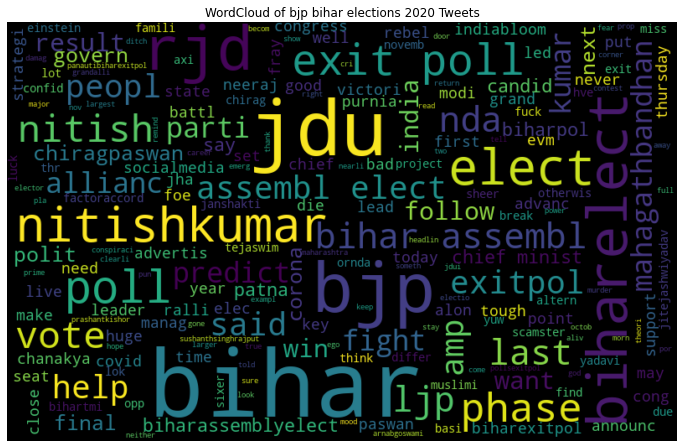

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

66

In [ ]:
df['Processed_Tweet']

1     [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
3     [socialmedia, manag, amp, advanc, advertis, st...
4     [win, bihar, elect, mahagathbandhan, ornda, jd...
5     [sheer, bad, luck, bihar, find, good, altern, ...
6     [factoraccord, einstein, basi, bihartmi, tejas...
                            ...                        
74    [stori, bihar, jdu, suspend, mlc, dinesh, pras...
75    [support, attend, bihar, chief, minist, elect,...
76    [biharelect, never, red, green, tricolour, fla...
77    [nitishkumar, bring, develop, prosper, bihar, ...
78    [mayb, bihar, elect, one, foe, inord, take, an...
Name: Processed_Tweet, Length: 66, dtype: object

In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 29
Negative Tweets: 6
Neutral Tweets 31




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.304,0.696,0.000,-0.5423
1,0.000,0.787,0.213,0.4019
2,0.000,0.678,0.322,0.5859
3,0.213,0.427,0.360,0.3400
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
61,0.164,0.643,0.193,0.1027
62,0.000,0.722,0.278,0.4019
63,0.000,1.000,0.000,0.0000
64,0.000,1.000,0.000,0.0000


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.304,0.696,0.000,-0.5423,Negative
1,0.000,0.787,0.213,0.4019,Positive
2,0.000,0.678,0.322,0.5859,Positive
3,0.213,0.427,0.360,0.3400,Positive
4,0.000,1.000,0.000,0.0000,Neutral


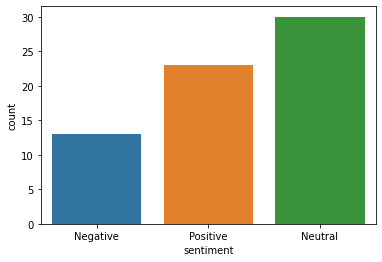

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)